In [2]:
import pandas as pd
import numpy as np
import scipy.odr as odr
import matplotlib.pyplot as plt


In [3]:
def leer_datos(nombre):
    datos = pd.read_table(f'datos\\{nombre}', skiprows=26, delim_whitespace=True, names=['Energia (eV)', "Angulo", 'Tiempo', 'Io', "I", 'Ln'])
    return datos

#def delta_E(Z): #Falta agregar la constante R para dsp ajustar y encontrar la cte estructura fina
#    return Z**4 / (2**3 * 2)

#Diccionario de el nombre del elemento y su numero Z
Z_dicc = {'Al': 13, 'Cu': 29, 'Ag': 47, 'Au': 79}

# Au (79)
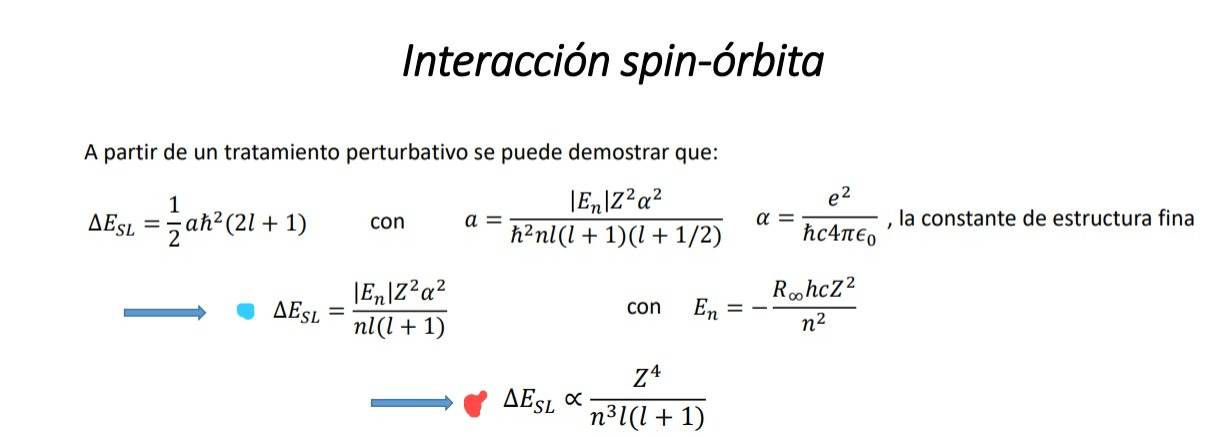

In [11]:
datos = pd.read_table(r'datos\Au.rx0', skiprows=30, delim_whitespace=True, names=['Energia (eV)', "Angulo", 'Tiempo', 'Io', "I", 'Ln'])
#mostrar solo la columna I
datos

,Energia (eV),Angulo,Tiempo,Io,I,Ln
0,11800.41,45.5330,1.0,96500.0,344793.0,-1.27340
1,11810.43,45.4922,1.0,96227.0,345152.0,-1.27727
2,11820.46,45.4515,1.0,95798.0,344674.0,-1.28036
3,11830.27,45.4117,1.0,96090.0,346119.0,-1.28150
4,11840.33,45.3709,1.0,96039.0,346510.0,-1.28316
...,...,...,...,...,...,...
133,13800.58,38.6457,1.0,72180.0,190543.0,-0.97071
134,13810.36,38.6172,1.0,71933.0,190094.0,-0.97178
135,13820.48,38.5878,1.0,72552.0,189592.0,-0.96057
136,13830.62,38.5584,1.0,72262.0,190510.0,-0.96941


In [12]:
datos['dx'] = datos['Ln'].diff()


In [17]:
#Printear los VALORES DE Energia en donde dx tenga un maximo
#max1 = datos['dx'].max()
datos[datos['dx'] == datos['dx'].max()]['Energia (eV)']
#recortar los datos y solo agarrar aquellos en donde energia > 13500
datos2 = datos[datos['Energia (eV)'] > 13500]
datos2[datos2['dx'] == datos2['dx'].max()]['Energia (eV)']


129    13760.62
Name: Energia (eV), dtype: float64

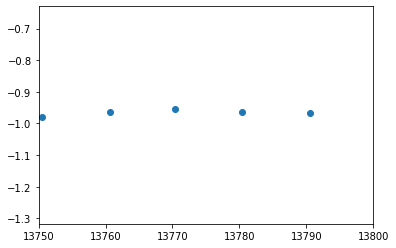

In [15]:
#plt.figure()
#plt.plot(datos['Energia (eV)'], datos['Ln'], 'o')
#plt.xlim(13750, 13800)
#plt.show()

AuL3 = 11900
AuL2 = 13760

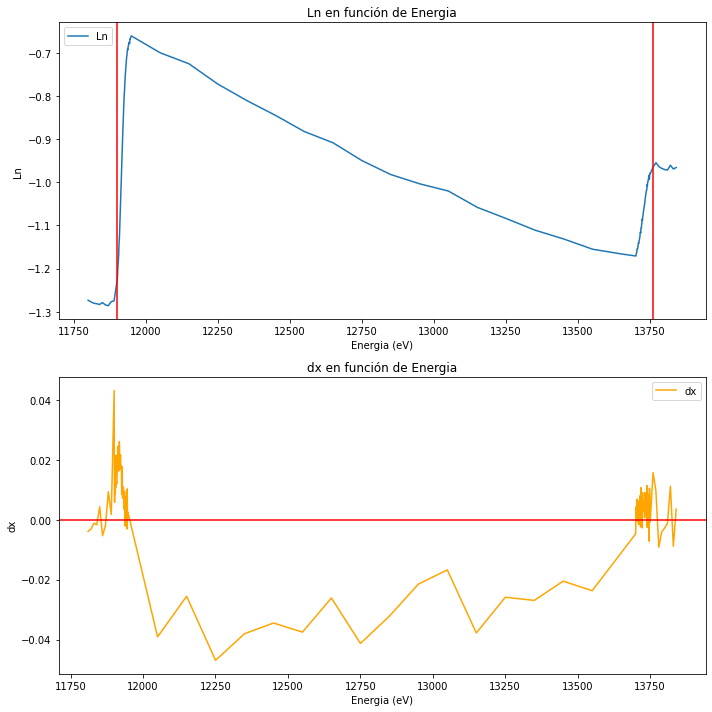

In [16]:
fig, axs = plt.subplots(2, figsize=(10,10))  # Crea una figura con 2 subplots

# Primer subplot: Ln vs Energia
axs[0].plot(datos['Energia (eV)'], datos['Ln'], label='Ln')
axs[0].axvline(x=AuL2, color='r', linestyle='-')
axs[0].axvline(x=AuL3, color='r', linestyle='-')
axs[0].set_xlabel('Energia (eV)')
axs[0].set_ylabel('Ln')
axs[0].legend()
axs[0].set_title('Ln en función de Energia')

# Segundo subplot: dx vs Energia
axs[1].plot(datos['Energia (eV)'], datos['dx'], label='dx', color='orange')
#axs[1].axvline(x=13770, color='r', linestyle='-')
#axs[1].axvline(x=11946.32, color='r', linestyle='-')
axs[1].axhline(y=0, color='r', linestyle='-')
axs[1].set_xlabel('Energia (eV)')
axs[1].set_ylabel('dx')
axs[1].legend()
axs[1].set_title('dx en función de Energia')

plt.tight_layout()  # Asegura que los subplots no se superpongan
plt.show()

In [60]:
Au_dE = AuL2 - AuL3
print(f'El valor de la diferencia de energía de Au es {Au_dE} eV')

El valor de la diferencia de energía de Au es 1823.6800000000003 eV


# Ba (56)

In [52]:
datos = pd.read_table(r'datos\Ba.rx0', skiprows=30, delim_whitespace=True, names=['Energia (eV)', "Angulo", 'Tiempo', 'Io', "I", 'Ln'])
datos['dx'] = datos['Ln'].diff()
datos

,Energia (eV),Angulo,Tiempo,Io,I,Ln,dx
0,5180.03,73.4871,1.0,7275.0,5224.0,0.33118,NaN
1,5190.06,73.3219,1.0,7501.0,5223.0,0.36196,0.03078
2,5200.06,73.1579,1.0,7781.0,5362.0,0.37235,0.01039
3,5210.04,72.9952,1.0,7636.0,5183.0,0.38749,0.01514
4,5220.05,72.8327,1.0,7878.0,5303.0,0.39580,0.00831
...,...,...,...,...,...,...,...
75,5655.04,66.4577,1.0,19951.0,2548.0,2.05797,0.07703
76,5665.05,66.3250,1.0,19733.0,2683.0,1.99536,-0.06261
77,5675.02,66.1935,1.0,20478.0,2846.0,1.97344,-0.02192
78,5685.03,66.0622,1.0,20593.0,2793.0,1.99783,0.02439


In [55]:
umbral = 1e-2# Ajusta este valor según sea necesario
energias = datos[abs(datos['dx']) < umbral]['Energia (eV)']
print(energias)

4     5220.05
7     5241.01
9     5243.02
17    5251.01
18    5252.05
21    5255.04
24    5285.01
26    5305.01
30    5345.04
38    5425.02
43    5475.04
53    5543.06
58    5548.02
64    5554.00
65    5555.01
74    5645.06
79    5695.07
Name: Energia (eV), dtype: float64


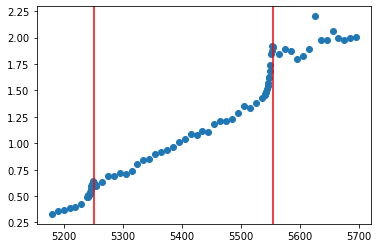

In [56]:
plt.figure()
plt.plot(datos['Energia (eV)'], datos['Ln'], 'o')
plt.axvline(x=5252.05, color='r', linestyle='-')
plt.axvline(x=5555, color='r', linestyle='-')
plt.show()

BaL3 = 5252.05
BaL2 = 5555

In [61]:
Ba_dE = BaL2 - BaL3
print(f'El valor de la diferencia de energía de Ba es {Ba_dE} eV')

El valor de la diferencia de energía de Ba es 777.6499999999996 eV


# Ce (58)

In [68]:
datos = pd.read_table(r'datos\Ce.rx0', skiprows=30, delim_whitespace=True, names=['Energia (eV)', "Angulo", 'Tiempo', 'Io', "I", 'Ln'])
datos['dx'] = datos['Ln'].diff()

In [ ]:
umbral = 1e-2# Ajusta este valor según sea necesario
energias = datos[abs(datos['dx']) < umbral]['Energia (eV)']
print(energias)

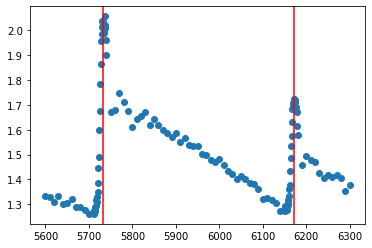

El valor de la diferencia de energía de Ce es 440 eV


In [73]:
CeL3 = 5732
CeL2 = 6172

plt.figure()
plt.plot(datos['Energia (eV)'], datos['Ln'], 'o')
plt.axvline(x=CeL3, color='r', linestyle='-')
plt.axvline(x=CeL2, color='r', linestyle='-')
plt.show()

Ce_dE = CeL2 - CeL3
print(f'El valor de la diferencia de energía de Ce es {Ce_dE} eV')

# Dy (66)

In [76]:
datos = pd.read_table(r'datos\Dy.rx0', skiprows=30, delim_whitespace=True, names=['Energia (eV)', "Angulo", 'Tiempo', 'Io', "I", 'Ln'])
datos['dx'] = datos['Ln'].diff()

In [ ]:
umbral = 7e-3# Ajusta este valor según sea necesario
energias = datos[abs(datos['dx']) < umbral]['Energia (eV)']
print(energias)

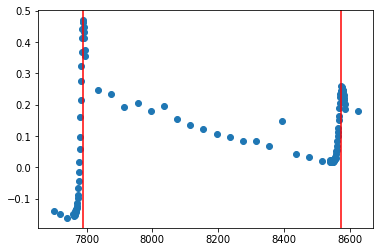

El valor de la diferencia de energía de Dy es 783 eV


In [95]:
DyL3 = 7790
DyL2 = 8573

plt.figure()
plt.plot(datos['Energia (eV)'], datos['Ln'], 'o')
plt.axvline(x=DyL3, color='r', linestyle='-')
plt.axvline(x=DyL2, color='r', linestyle='-')
plt.show()

Dy_dE = DyL2 - DyL3
print(f'El valor de la diferencia de energía de Dy es {Dy_dE} eV')

# Er (68)

In [98]:
datos = pd.read_table(r'datos\Er.rx0', skiprows=30, delim_whitespace=True, names=['Energia (eV)', "Angulo", 'Tiempo', 'Io', "I", 'Ln'])
datos['dx'] = datos['Ln'].diff()

In [110]:
umbral = 2e-2
energias = datos[abs(datos['dx']) < umbral]['Energia (eV)']
print(energias)

1     8210.21
2     8220.14
3     8230.21
4     8240.19
5     8250.19
6     8260.22
7     8270.16
8     8280.11
10    8300.22
11    8310.13
13    8330.15
14    8340.13
16    8346.20
17    8347.16
18    8348.23
19    8349.19
20    8350.14
33    8363.16
34    8364.12
42    8470.17
43    8520.18
58    9250.18
59    9251.21
60    9252.23
61    9253.26
62    9254.28
63    9255.16
64    9256.19
75    9267.19
76    9268.22
84    9276.17
85    9277.20
86    9278.23
87    9279.26
88    9280.14
89    9290.17
Name: Energia (eV), dtype: float64


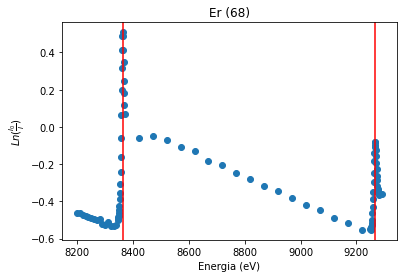

El valor de la diferencia de energía de Er es 903.0 eV


In [113]:
ErL3 = 8364.20
ErL2 = 9267.2

plt.figure()
plt.plot(datos['Energia (eV)'], datos['Ln'], 'o')
plt.axvline(x=ErL3, color='r', linestyle='-')
plt.axvline(x=ErL2, color='r', linestyle='-')
plt.title('Er (68)')
plt.xlabel('Energia (eV)')
plt.ylabel(r'$Ln(\frac{I_{0}}{I})$')
plt.show()

Er_dE = ErL2 - ErL3
print(f'El valor de la diferencia de energía de Er es {Er_dE} eV')

# Gd (64)

In [114]:
datos = pd.read_table(r'datos\Gd.rx0', skiprows=30, delim_whitespace=True, names=['Energia (eV)', "Angulo", 'Tiempo', 'Io', "I", 'Ln'])
datos['dx'] = datos['Ln'].diff()

In [119]:
umbral = 3e-3
energias = datos[abs(datos['dx']) < umbral]['Energia (eV)']
print(energias)

16    7310.01
23    7380.05
27    7420.09
29    7440.13
32    7470.12
34    7490.00
38    7530.10
40    7550.03
41    7560.10
47    7620.08
51    7660.11
53    7680.13
55    7700.11
60    7750.06
65    7800.04
69    7840.13
70    7850.06
72    7870.00
73    7880.00
Name: Energia (eV), dtype: float64


In [125]:
# Recortar los datos para que solo queden los mayores a 7800 eV
datos2 = datos[datos['Energia (eV)'] > 7800]
#Encontrar el valor maximo de datos2 en la columna Ln y devolver el valor de su energia
datos2['Energia (eV)'][datos2['Ln'].idxmax()]



7930.1

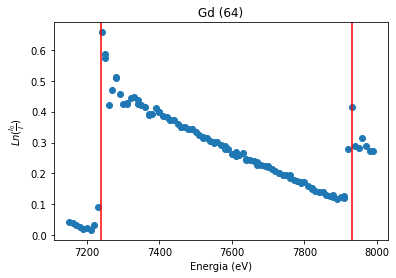

El valor de la diferencia de energía de Gd es 690 eV


In [126]:
GdL3 = 7240
GdL2 = 7930

plt.figure()
plt.plot(datos['Energia (eV)'], datos['Ln'], 'o')
plt.axvline(x=GdL3, color='r', linestyle='-')
plt.axvline(x=GdL2, color='r', linestyle='-')
plt.title('Gd (64)')
plt.xlabel('Energia (eV)')
plt.ylabel(r'$Ln(\frac{I_{0}}{I})$')
plt.show()

Gd_dE = GdL2 - GdL3
print(f'El valor de la diferencia de energía de Gd es {Gd_dE} eV')

# Hf (72)

In [127]:
datos = pd.read_table(r'datos\Hf.rx0', skiprows=30, delim_whitespace=True, names=['Energia (eV)', "Angulo", 'Tiempo', 'Io', "I", 'Ln'])
datos['dx'] = datos['Ln'].diff()

In [ ]:
umbral = 1e-2
energias = datos[abs(datos['dx']) < umbral]['Energia (eV)']
print(energias)

In [137]:
#Valor de energia para Ln maximo de datos
datos['Energia (eV)'][datos['Ln'].idxmax()]

9563.16

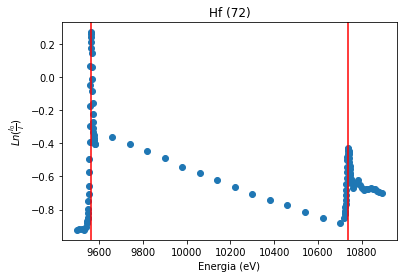

El valor de la diferencia de energía de Hf es 1175.1900000000005 eV


In [138]:
HfL3 = 9563.16
HfL2 = 10738.35

plt.figure()
plt.plot(datos['Energia (eV)'], datos['Ln'], 'o')
plt.axvline(x=HfL3, color='r', linestyle='-')
plt.axvline(x=HfL2, color='r', linestyle='-')
plt.title('Hf (72)')
plt.xlabel('Energia (eV)')
plt.ylabel(r'$Ln(\frac{I_{0}}{I})$')
plt.show()

Hf_dE = HfL2 - HfL3
print(f'El valor de la diferencia de energía de Hf es {Hf_dE} eV')

# Ho (67)

In [139]:
datos = pd.read_table(r'datos\Ho.rx0', skiprows=30, delim_whitespace=True, names=['Energia (eV)', "Angulo", 'Tiempo', 'Io', "I", 'Ln'])
datos['dx'] = datos['Ln'].diff()


In [144]:
umbral = 3e-3
energias = datos[abs(datos['dx']) < umbral]['Energia (eV)']
print(energias)

9     8063.09
24    8078.03
35    8245.07
65    8923.00
Name: Energia (eV), dtype: float64


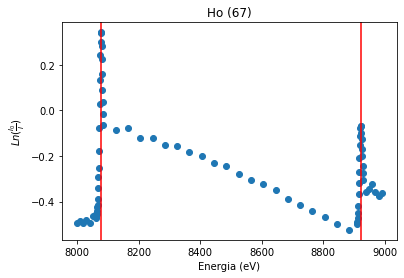

El valor de la diferencia de energía de Ho es 845 eV


In [145]:
HoL3 = 8078
HoL2 = 8923

plt.figure()
plt.plot(datos['Energia (eV)'], datos['Ln'], 'o')
plt.axvline(x=HoL3, color='r', linestyle='-')
plt.axvline(x=HoL2, color='r', linestyle='-')
plt.title('Ho (67)')
plt.xlabel('Energia (eV)')
plt.ylabel(r'$Ln(\frac{I_{0}}{I})$')
plt.show()

Ho_dE = HoL2 - HoL3
print(f'El valor de la diferencia de energía de Ho es {Ho_dE} eV')

# Nd (60)

In [146]:
datos = pd.read_table(r'datos\Nd.rx0', skiprows=30, delim_whitespace=True, names=['Energia (eV)', "Angulo", 'Tiempo', 'Io', "I", 'Ln'])
datos['dx'] = datos['Ln'].diff()

In [151]:
umbral = 9e-3
energias = datos[abs(datos['dx']) < umbral]['Energia (eV)']
print(energias)

4     6140.09
7     6170.08
9     6190.01
10    6191.07
11    6192.04
12    6193.00
13    6194.07
16    6197.07
17    6198.04
20    6201.04
42    6280.07
45    6340.00
46    6360.02
50    6440.05
55    6540.08
65    6711.03
66    6712.06
68    6714.10
78    6724.00
79    6725.03
87    6760.10
Name: Energia (eV), dtype: float64


In [154]:
# Devolver el valor de la energia para el maximo de Ln
datos['Energia (eV)'][datos['Ln'].idxmax()]

6213.08

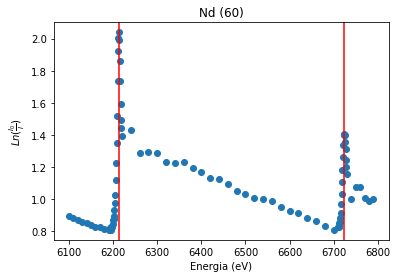

El valor de la diferencia de energía de Nd es 511 eV


In [155]:
NdL3 = 6213
NdL2 = 6724

plt.figure()
plt.plot(datos['Energia (eV)'], datos['Ln'], 'o')
plt.axvline(x=NdL3, color='r', linestyle='-')
plt.axvline(x=NdL2, color='r', linestyle='-')
plt.title('Nd (60)')
plt.xlabel('Energia (eV)')
plt.ylabel(r'$Ln(\frac{I_{0}}{I})$')
plt.show()

Nd_dE = NdL2 - NdL3
print(f'El valor de la diferencia de energía de Nd es {Nd_dE} eV')